In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mafki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# remplir notre liste de stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "très", "vers", "cependant", "plusieurs",
        "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "janvier",
        "février", "mars", "april", "mai", "juin", "juillet", "août", "septembre", "octobre", 
        "novembre", "decembre", "enfants", "peu", "situation", "près", "soir", "quelques", 
        "monsieur", "madame", "dame","dernier", "brux", "chez", "un", "quatre", "cinq", "neuf",
        "dix","tél", "alors", "toute", "moment", "etc", "celui", "ceux", "toujours", "général",
       "jours", "jour", "mois", "année", "années", "heure","heures","semaine", "minutes","temps",
        "lors","cas", "rien", "direction", "devant", "dès", "nouveau", "haut", "déjà", "puis",
        "leurs", "fois", "avant","première", "car", "grande", "grand", "petite", "petit", "cse",
        "min",  "ecr","tel", "pet","sdb", "sit", "apr", "chb", "bur", "fem","com", "psb", "terr",
        "pers", "liv", "prés", "mod","mén", "frs","bur","ecr","int","sem","ares", "app","rez","six",
         "chff", "aff","dem","cft","bel","hres","demi","effet","numéro", "notamment", "cause",
          "jard", "extra", "réf", "trav", "point","jean", "ans", "apart", "faç", "gar", "également",
         "bxl", "trav", "voit", "buts", "mise", "divers", "pierre", "poss", "rem", "chée",
         "vis", "psc", "rossel", "téléph", "trop", "beaucoup", "rue", 
        
          ]
sw = set(sw)

In [5]:
#choisir une année
year = 1970

In [6]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1970-01-03_01-00002.txt',
 'KB_JB838_1970-01-06_01-00004.txt',
 'KB_JB838_1970-01-07_01-00020.txt',
 'KB_JB838_1970-01-09_01-00010.txt',
 'KB_JB838_1970-01-10_01-00029.txt',
 'KB_JB838_1970-01-18_01-00013.txt',
 'KB_JB838_1970-01-21_01-00011.txt',
 'KB_JB838_1970-01-22_01-00032.txt',
 'KB_JB838_1970-01-25_01-00014.txt',
 'KB_JB838_1970-02-04_01-00006.txt',
 'KB_JB838_1970-02-11_01-00015.txt',
 'KB_JB838_1970-02-13_01-00026.txt',
 'KB_JB838_1970-02-14_01-00006.txt',
 'KB_JB838_1970-02-14_01-00022.txt',
 'KB_JB838_1970-02-15_01-00016.txt',
 'KB_JB838_1970-02-19_01-00011.txt',
 'KB_JB838_1970-02-20_01-00007.txt',
 'KB_JB838_1970-02-26_01-00022.txt',
 'KB_JB838_1970-03-04_01-00015.txt',
 'KB_JB838_1970-03-10_01-00024.txt',
 'KB_JB838_1970-03-15_01-00011.txt',
 'KB_JB838_1970-03-19_01-00015.txt',
 'KB_JB838_1970-03-22_01-00002.txt',
 'KB_JB838_1970-03-22_01-00029.txt',
 'KB_JB838_1970-03-27_01-00018.txt',
 'KB_JB838_1970-03-28_01-00027.txt',
 'KB_JB838_1970-06-02_01-00032.txt',
 

In [7]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [8]:
# stocker tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1970_clean.txt!'

In [14]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding="utf-8") as f:
    after = f.read()

after[:500]

'mam vie politique sociale rapport association belge banques secteur public évolution sympathique belges familiarisent usage chèque parmi ensemble renseigne meqts intéressants figurent rapport annuel association belge banques graphique concernant proportion creances banques secteur public rapport total créances secteur public privé voici pourcentage présenté importance relative créances banques secteur publie fin belgique pays bas italie allemagne france date indiquée effets fonds publiés constit'

In [15]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('bruxelles', 1181), ('prix', 462), ('part', 441), ('place', 382), ('service', 324), ('ecrire', 322), ('agence', 320), ('demande', 303), ('cuis', 281), ('cours', 267), ('avenue', 266), ('bon', 256), ('maison', 254), ('belge', 252), ('belgique', 248), ('libre', 246), ('villa', 244), ('pays', 235), ('centre', 232), ('saint', 226), ('lieu', 226), ('francs', 226), ('travail', 221), ('fin', 220), ('bureau', 216), ('midi', 216), ('jeune', 213), ('société', 210), ('uccle', 210), ('bonne', 209), ('but', 203), ('engage', 189), ('france', 188), ('bilingue', 188), ('équipe', 187), ('vitae', 185), ('partie', 181), ('président', 181), ('votes', 172), ('français', 171), ('louise', 167), ('vente', 166), ('premier', 165), ('vendre', 165), ('marché', 164), ('offre', 163), ('suite', 160), ('cherche', 160), ('millions', 158), ('monde', 156), ('etat', 155), ('expérience', 154), ('paris', 153), ('curriculum', 151), ('importante', 150), ('division', 150), ('vue', 149), ('jeu', 146), ('matin', 146), ('prése

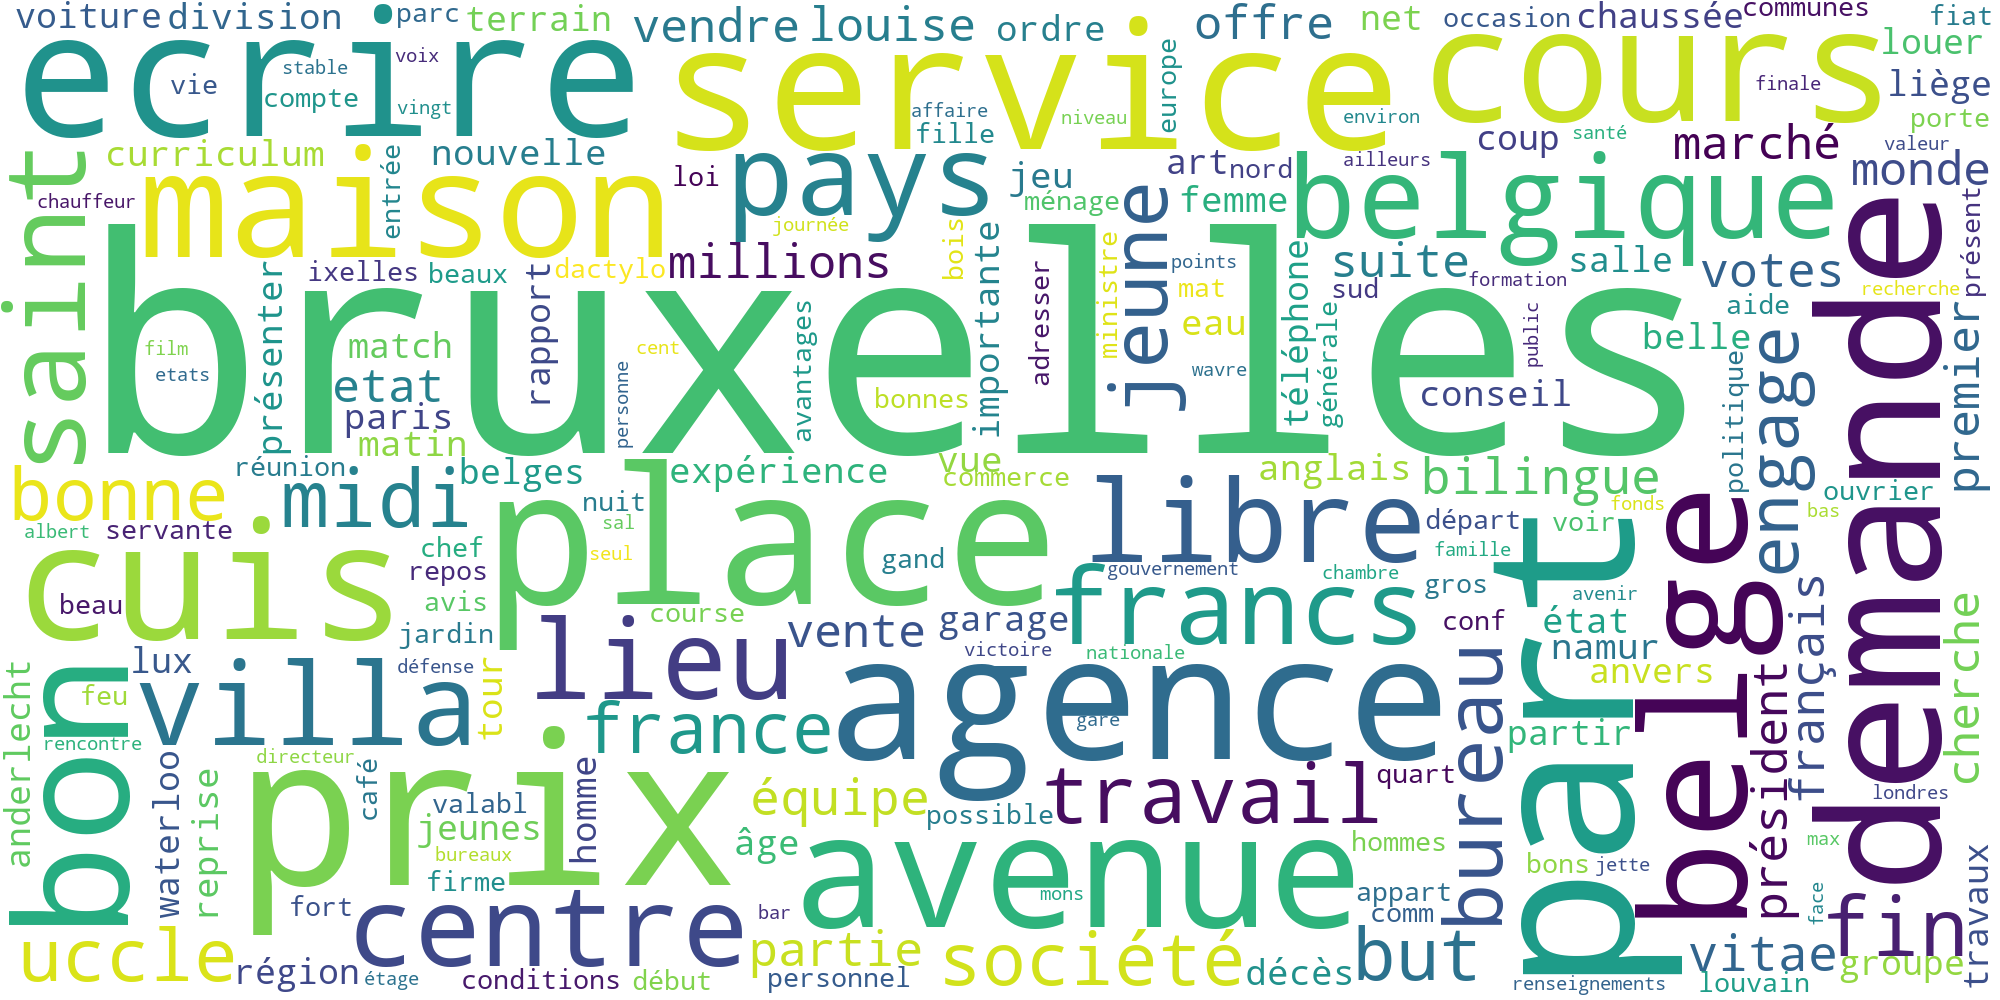

In [16]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"),)
Image(filename=os.path.join(temp_path, f"{year}.png"))